In [56]:
import pandas as pd
import numpy as np

In [57]:
#load data
location = 'C:/Users/andti/OneDrive/Documents/Datasets/WELFake_Dataset.csv'
d = pd.read_csv(location)
d.drop(['Unnamed: 0'], axis=1, inplace = True)

In [66]:
DataSet = d.copy()

In [67]:
DataSet.label.value_counts()

1    37106
0    35028
Name: label, dtype: int64

In [68]:
#using text as an indicator 
TextDS = d[['text', 'label']]

In [69]:
#remove stop words
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
def TextWrangle (DataElement):
    LowerCase = DataElement.str.lower()
    RemoveStopWords = LowerCase.astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    return RemoveStopWords

In [73]:
TextDS['text'] = TextWrangle(TextDS['text'])

C:\Users\andti\AppData\Local\Temp\ipykernel_12428\1858801252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TextDS['text'] = TextWrangle(TextDS['text'])


In [75]:
#remove nulls
NullLines = TextDS['text'].isnull()
TextDS = TextDS[~NullLines]

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    sublinear_tf=True, 
    min_df=5, 
    norm='l2', 
    encoding='latin-1', 
    ngram_range=(1,2), 
    stop_words='english', 
    max_features=5000)

features = tfidf.fit_transform(TextDS.text).toarray()
labels = TextDS.label

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

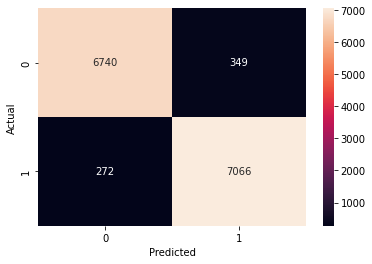

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conMatrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [79]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7089
           1       0.95      0.96      0.96      7338

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427

